<a href="https://colab.research.google.com/github/SusannYY/Unemployment-Rate-Analysis/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://machinelearningapplied.com/wp-content/uploads/2019/10/matplotlib_logo.png'>

# Overview

In this week's lab, we are going to explore visualization methods using Matplotlib. It is a commonly used and extremely useful data visualization libraries, which also often appears as a preferred requirement in industry recruitment.

You can check out the [Matplotlib](https://matplotlib.org/stable/gallery/index.html) tutorials for more information and more advanced usage!

Note: we are going to use the planets dataset in this lab, which is a built-in dataset in Seaborn (see the list of all built-in datasets [here](https://github.com/mwaskom/seaborn-data)).\
Now let's firt start by importing the library.\
We use `np` shorthand for NumPy, `pd` shorthand for Pandas, and similarly we use certain standard shorthands `mpl` `plt` `sns`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib Visualizations:

*   Pie chart
*   Bar chart
*   Line chart
*   Histogram
*   Boxplot
*   Voilin plot
*   Scatter plot
*   Stack plot
*   Others (Stem plot)

## Pie chart


Pie chart shows distribution of data based on proportion of pie occupied. \
Eg: Market share in Films.\
However pie chart [can be difficult](https://www.data-to-viz.com/caveat/pie.html) to compare sections of the chart. Bar plot is used instead as comparing sections is easy.

In [ ]:
#Importing dataset
planets = sns.load_dataset('planets')
planets.head(5)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
# count how many times each method is used
method_counts = planets["method"].value_counts()
method_counts

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

In [ ]:
# record the name of methods
method_names = method_counts.index
method_names

Index(['Radial Velocity', 'Transit', 'Imaging', 'Microlensing',
       'Eclipse Timing Variations', 'Pulsar Timing',
       'Transit Timing Variations', 'Orbital Brightness Modulation',
       'Astrometry', 'Pulsation Timing Variations'],
      dtype='object')

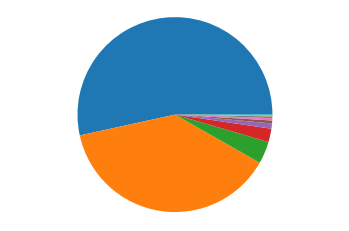

In [ ]:
plt.pie(x = method_counts)
plt.axis('equal')
plt.show()

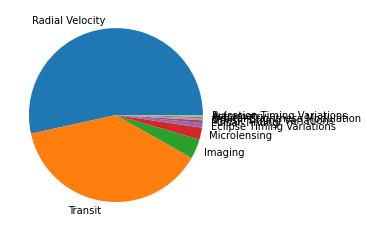

In [ ]:
plt.pie(x = method_counts, labels = method_names)
plt.show()

We can see that **labels** overlap here due to large dataset. We can add a **[legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)** to the figure.\
And change the figure size through `figuresize` and `prop={'size': num}`

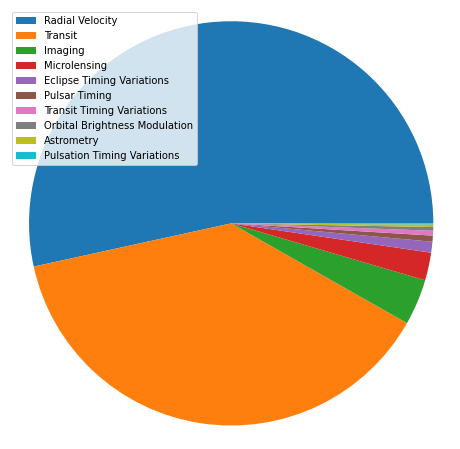

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(x = method_counts)
plt.axis('equal')
plt.legend(method_names, loc='upper left', prop={'size': 10})
plt.show()

Pie chart customizations to beautify: read more [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html).

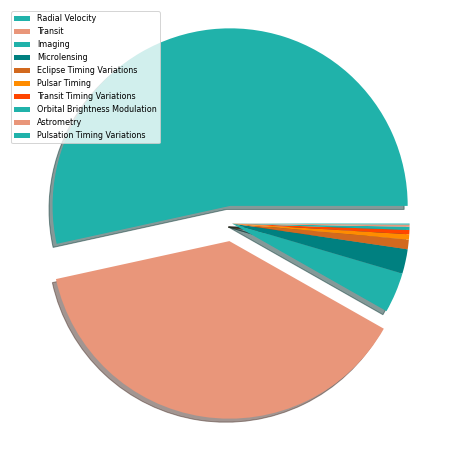

In [ ]:
plt.figure(figsize=(8, 8))
explode = (0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)
colors = ['lightseagreen', 'darksalmon', 'lightseagreen', 'teal','chocolate', 'darkorange', 'orangered']
plt.pie(x = method_counts, colors = colors, explode = explode, shadow = True)
plt.axis('equal')
plt.legend(method_names, loc='upper left', prop={'size': 8})
plt.show()

# Bar chart

[Bar Plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) shows the **distribution** of data **over several groups**. It can either be vertical or horizontal. In a vertical bar chart, the **categories** (e.g. freshman, sophomore, junior, senior) is on the x-axis and the measure of **frequency** (e.g. number, frequency density, percentage) is on the y-axis.\
Eg: Student marks in an exam\
Comparation: histogram - only takes numerical data for plotting

we need 2 arrays for a bar chart: \
1.   An array of the of the category values (methods in our planets dataset) \
2.   An array of the frequency of these different categories (number of planets measured by different methods in our planets dataset)

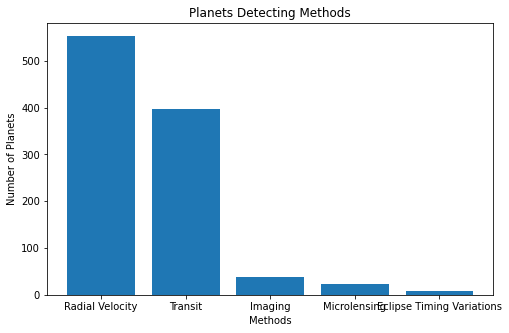

In [ ]:
plt.figure(figsize=(8,5))
# Visualize the top 5 used methods
plt.bar(x = method_names[0:5], height = method_counts[0:5])
plt.xlabel('Methods')
plt.ylabel('Number of Planets')
plt.title('Planets Detecting Methods')
plt.show()

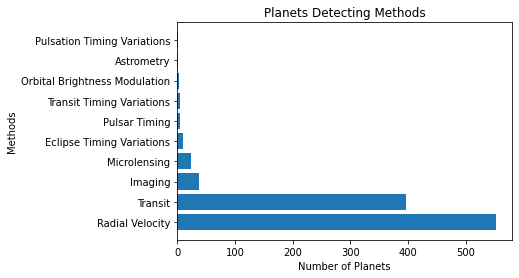

In [ ]:
#Horizontal bar chart
plt.barh(method_names, method_counts)
plt.xlabel('Number of Planets')
plt.ylabel('Methods')
plt.title('Planets Detecting Methods')
plt.show()

You can customize your bar chart by changing its color, borders, etc. See the link in bar chart description above for the full list and methods.

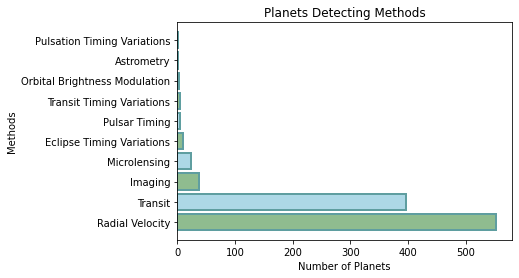

In [ ]:
plt.barh(method_names, method_counts, color = ["darkseagreen", "lightblue"], edgecolor = "cadetblue", linewidth = 2)
plt.xlabel('Number of Planets')
plt.ylabel('Methods')
plt.title('Planets Detecting Methods')
plt.show()

**Try it yourself:** \
pick another categorical variable from our planets dataset to visualize your own bar chart. \
(feel free to use pandas `groupby`/`sort_values` functions to first sort data then draw graph) \
(if dataset too big, try using `.head(num)` function to only analyze limited numbers of data)

# Line chart
A line chart is used for visualizing trends and patterns in a numerical variable. It is useful in understanding the trend over time. It can explain the correlation between points by the trend. \
Eg. Stock Market Analysis of Companies, Weather Forecasting \
Our Unemployment Rate dataset can be a good fit for time series visualized using line chart.

To create a line chart, we need 2 arrays:
1.   An array of the values of the numerical variable \
2.   An array of the categories (eg. time periods) \

We are going to use the stock data to better explain this chart.

In [ ]:
stock = sns.load_dataset('dowjones')
stock.head(5)

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45


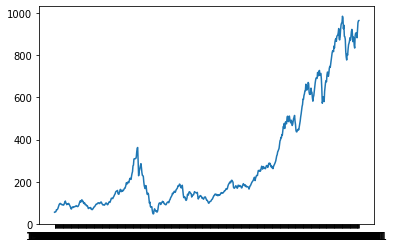

In [ ]:
plt.plot(stock["Date"], stock["Price"]) 
plt.show()

You can see that we have the time period labels overlapping on the x-axis. \
We can try `plt.xticks(rotation=...)` , but it only applies to shorter time periods.

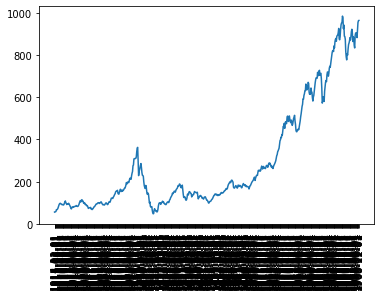

In [ ]:
plt.plot(stock["Date"], stock["Price"])
plt.xticks(rotation=90)
plt.show()

***Below is a bit advanced and it's ok if you only want to include the first line chart in your finat project.*** \

To further solve this problem, we can use `ax.set_xticks(...)` to step certain digits. \
Eg. `ax.set_xticks(np.arange(0, max_number, 5))` means stepping 5 digits \
1. [Example](https://pythonguides.com/matplotlib-set-xticks/) of using `set_xticks` function. \
2. You may notice that this example uses `subplots` instead of `pyplot`. You can read this [article](https://towardsdatascience.com/clearing-the-confusion-once-and-for-all-fig-ax-plt-subplots-b122bb7783ca) about comparing these two. \
3. You can see this [discussion](https://stackoverflow.com/questions/50033189/matplotlib-x-axis-overlap) about labels overlapping problem if interested. \

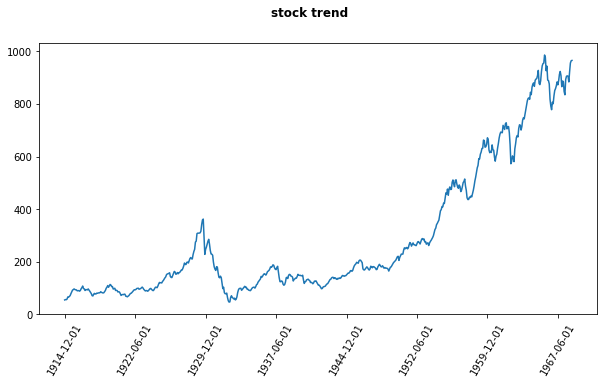

In [ ]:
# first use subplots() to create a frame of your plot (figure and axes)
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(stock["Date"], stock["Price"])
plt.xticks(rotation=60)

# We have 650 time nodes in this dataset. 
# So we start from the 0th time node, and end at 650th time node.
# and step 90 digits each time - only have the 0th, 90th, 180th, ... time nodes showing on this graph.
ax.set_xticks(np.arange(0, 651, 90))
fig.suptitle('stock trend', fontweight ="bold")
plt.show()

We can also customize our graph! Customization doc: [link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

<Figure size 720x432 with 0 Axes>

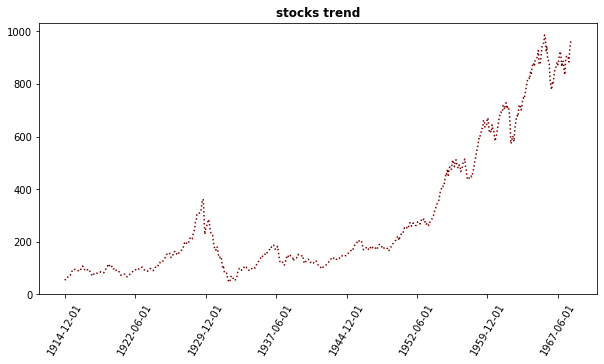

In [ ]:
plt.figure(figsize=(10,6))
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(stock["Date"], stock["Price"], color = "maroon", linestyle = "dotted")
plt.xticks(rotation=60)
ax.set_xticks(np.arange(0, 651, 90))
plt.title("stocks trend", fontweight ="bold")
plt.show()

# Histogram
A [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) is used for visualizing the distribution of a numerical variable. It gives you a sense of the frequency of different values of the variable in your dataset. The values of the numerical variable are on the x-axis and the measure of frequency (e.g. number, frequency density) is on the y-axis.

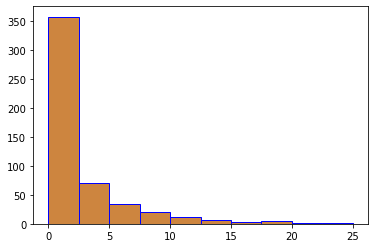

In [ ]:
plt.hist(planets["mass"], facecolor='peru', edgecolor='blue')
plt.show()

We can set the `bin` value: \
The default value of the number of bins to be created in a histogram is 10. \
bins = 5, i.e the number of bins to be created is 5.

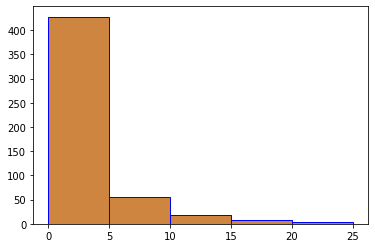

In [ ]:
plt.hist(planets["mass"], facecolor='peru', bins = 5, edgecolor='blue')
plt.show()

Unequal `bin` width & set `density`: \
By passing a sequence in the bins parameter

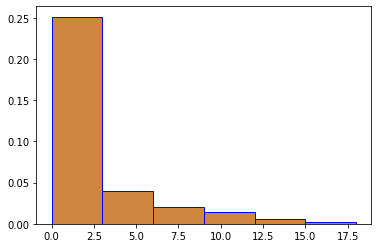

In [ ]:
# bins=range(min(data), max(data) + binwidth
plt.hist(planets["mass"], facecolor='peru', bins = np.arange(0, 20, 3), density = True, edgecolor='blue')
plt.show() 

We can also check the histogram to a `range` of values: \
We only look at the data points within the range 0 to 15. This realigns the bins in the histogram.

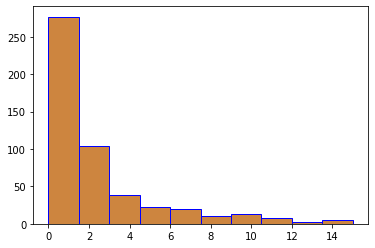

In [ ]:
plt.hist(planets["mass"], facecolor='peru', bins = 10, range=(0, 15), edgecolor='blue')
plt.show()

The cumulative property: \
`cumulative=True` means each bin gives the counts in that bin plus all bins for smaller values. The last bin gives the total number of datapoints.

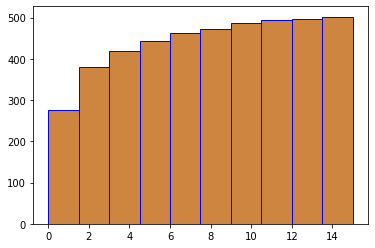

In [ ]:
plt.hist(planets["mass"], facecolor='peru', range=(0, 15), cumulative=True, edgecolor='blue')
plt.show()

Multiple histograms: \
`plt.hist(...)` # histogram 1 \
`plt.hist(...)` # historgam 2 \
`plt.show()` \

Try it yourself! (feel free to use other seaborn built-in data)

# Boxplot
A [boxplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html) is similar to a histogram in that it allows you to visualize the distribution of a numerical variable. Boxplot should be used when we require to use the overall statistical information on the distribution of the data. It can be used to detect outliers in the data. whereas a histogram gives you a better visual sense of the spread of the variable. \
Use this image to have a better understanding. ([sourse](https://flowingdata.com/2008/02/15/how-to-read-and-use-a-box-and-whisker-plot/))

![image.png](https://miro.medium.com/max/482/1*fCE_5juz235c6cmaOP_PDQ.png)

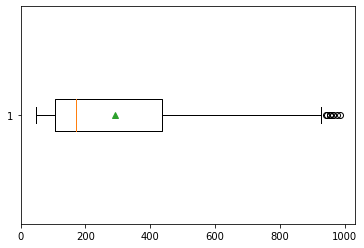

In [ ]:
# we can use showmeans to show means
plt.boxplot(x = stock["Price"], vert = False, showmeans = True)
plt.show()

Question: How is the variable skewed? How can you tell by looking at the boxplot?

# Violin plot
Violin plot is a better chart than boxplot as it gives a much broader understanding of the distribution. \
Similar to boxplots, except they can show the density of the data points around a particular value with their widths. \
Below is a comparing between histogram and violin plot

![image.png](https://chartio.com/assets/5dc965/tutorials/charts/violin-plots/6d36a1ec714eb5aeac26242adac4de7e753a745d30ea1ed521f5817d1573ed60/faceted-histogram-example.png)

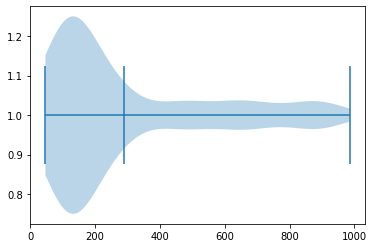

In [ ]:
plt.violinplot(stock["Price"], vert = False, showmeans = True)
plt.show()

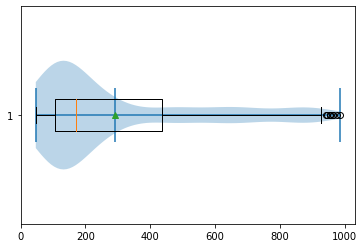

In [ ]:
plt.boxplot(x = stock["Price"], vert = False, showmeans = True)
plt.violinplot(stock["Price"], vert = False, showmeans = True)
plt.show()

# Scatter plot

[Scatter plots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) are used for visualizing the relationship between two numerical variables, which gives you a sense of how one variable changes with respect to the other. \
Here we want to see how tips paid to taxis change with respect to the distance.

In [ ]:
# here let's try the taxis built-in dataset
taxis = sns.load_dataset("taxis")
taxis.head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


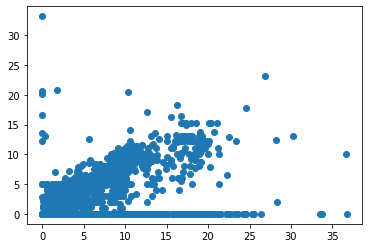

In [ ]:
plt.scatter(x = taxis["distance"], y = taxis["tip"])
plt.show()

Here you can see some points **overlap** in this plot and your graphic becomes less unreadable. This is pretty common in data visualization, especially when your dataset is big. \
Let's see some possible ways to avoid it: \
1. change `size`, change transparency using `alpha`, use `density` graph, etc. \
2. decrease the number of observations. We can use the `sample()` function of pandas library to select a random sample of items. This method is taught and practiced a lot in Data C8
3. check out this more detailed article: [link](https://www.python-graph-gallery.com/134-how-to-avoid-overplotting-with-python)

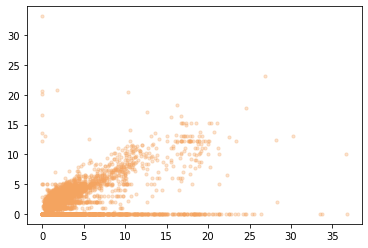

In [ ]:
# add alpha and size (s) parameters
plt.scatter(x = taxis["distance"], y = taxis["tip"], color = "sandybrown", s = 10, alpha = 0.3)
plt.show()

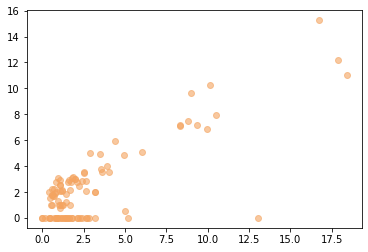

In [ ]:
# Sample 1000 random lines
taxis_sampling = pd.DataFrame(taxis).sample(100)
plt.scatter(x = taxis_sampling["distance"], color = "sandybrown", alpha = 0.6, y = taxis_sampling["tip"])
plt.show()

# Stack plot
Stack plot visualizes data in stacks and shows the distribution of data over time. \
It is used for checking multiple variable area plots in a single plot and understanding the change of distribution in multiple variables over an interval.\
Eg: comparing different stock indexes of industries

Let's say we try to compare the change of distribution in distance travelled by taxis and tips given by customers:

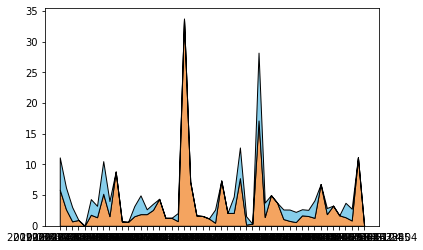

In [ ]:
taxis_sampling = pd.DataFrame(taxis).sample(50)
x = taxis_sampling["pickup"]
y = np.vstack([taxis_sampling["distance"], taxis_sampling["tip"]])
plt.stackplot(x, y, colors = ["sandybrown", "skyblue"], edgecolor='black')
plt.show()

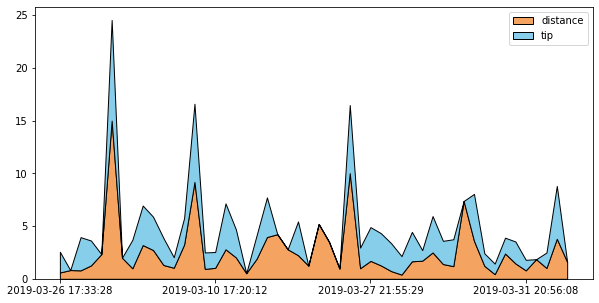

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

taxis_sampling = pd.DataFrame(taxis).sample(50)
x = taxis_sampling["pickup"]
y = np.vstack([taxis_sampling["distance"], taxis_sampling["tip"]])
labels = ['distance', 'tip']

plt.stackplot(x, y, labels = labels, colors = ["sandybrown", "skyblue"], edgecolor='black')
plt.legend()

ax.set_xticks(np.arange(0, 51, 15))
plt.show()

# Other plots:

## Eg. Stem Plot
Stemplot even takes negative values, so the difference is taken of data and is plotted over time. \
When to use: It is similar to a stack plot but the difference helps in comparing the data points. \
We won't cover in this lab. Here is an example to help you have a more intuitional understanding: \

![image.png](https://miro.medium.com/max/1400/1*AlIkWpXoCSdzut5xwJ4jEw.png)

# Written by Susan Yang
--- 

